<a href="https://colab.research.google.com/github/EmAchieng/DataSciencePracticeSeries/blob/master/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Q0'></a>
<center><a target="_blank" href="http://www.propulsion.academy"><img src="https://drive.google.com/uc?id=1McNxpNrSwfqu1w-QtlOmPSmfULvkkMQV" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>
<center> <h1> Live coding 2: Pandas </h1> </center>
<p style="margin-bottom:1cm;"></p>
<center><h4>Propulsion Academy, 2021</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm;color:#303030">
        <p><strong>Goal:</strong> learn how to read, clean and explore data using Pandas</p>
        <strong> Outline:</strong>
        <a id='P0' name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href='#SU'>Set up</a></li>
            <li> <a style="color:#303030" href='#P1'>Basic Functionalities</a></li>
            <li> <a style="color:#303030" href='#P2'>Reading and Viewing Data</a></li>
            <li> <a style="color:#303030" href='#P3'>Data Types</a></li>
            <li> <a style="color:#303030" href='#P4'>Data Selection</a></li>
            <li> <a style="color:#303030" href='#P5'>Group by</a></li>
            <li> <a style="color:#303030" href='#P6'>Melt and Pivot Table</a></li>
            <li> <a style="color:#303030" href='#P7'>Apply</a></li>
            <li> <a style="color:#303030" href='#P8'>Basic Plotting</a></li>
            <li> <a style="color:#303030" href='#P9'>Merge and Concat</a></li>
            <li> <a style="color:#303030" href='#CL'>To go Further</a></li>
        </ol>
        <strong>Topics Trained:</strong> Pandas, Series, DataFrames, i/o, data selection, 
    </div>
</div>

<nav style="text-align:right"><strong>
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/intro-2-ds-materials/index.html" title="momentum"> Introduction to Data Science </a>|
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/intro-2-ds-materials/weeks/week1/day2/index.html" title="momentum">Day 2, Data Wrangling </a>|
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/intro-2-ds-materials/weeks/week1/day2/pages/materials.html" title="momentum"> Live Coding 2, introduction to Pandas</a>
</strong></nav>

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Global Parameters Setting

In [ ]:
plt.style.use("seaborn")

<a id='P1' name='P1'></a>
## [Basic Functionality](#P0)

Pandas has the following three data structures

* Series - 1D labeled homogeneous array, size-immutable
* DataFrame - General 2D labeled, size-mutable tabular structure with potentially heterogeneously typed columns (think of it like a table or excel sheet)
* Panel - General 3D labeled, size-mutable array

Most of the time, you will be working with Series and DataFrames. 

To create a Series from a python list, we type:

In [ ]:
s = pd.Series(
    [1, 3, 5, np.nan, 6, 8]
)  # => create a series with the values in list ([])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

we can create a dataframe from a numpy array this way:

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4))
df

,0,1,2,3
0,-0.006079,-1.263035,-0.088833,0.397424
1,-0.079968,1.147763,-1.500888,1.167591
2,-1.069425,-0.100262,1.673520,-0.816196
3,-0.569356,1.270771,1.233026,-1.243296
4,-0.583948,-2.493271,1.068275,0.991024
5,-0.204421,0.996563,-0.982626,0.508176


as you can see from the output above, column names and row indices are automatically attributed. You can also specify them when creating the dataframe:

In [ ]:
df = pd.DataFrame(
    np.random.randn(6, 4), index=[0, 10, 22, 20, 4, 5], columns=["A", "B", "C", "D"]
)
df

,A,B,C,D
0,1.739710,1.770176,1.844727,1.759487
10,0.339787,0.613727,-0.316368,-0.080978
22,-0.347948,-0.221770,1.026763,-0.178930
20,1.092037,-0.583543,1.488660,-1.367666
4,-0.056963,-0.649872,0.305970,1.887835
5,-0.789331,-0.766098,2.157835,0.008909


<a id='P2' name='P2'></a>
## [Reading and Viewing Data](#P0)

In this tutorial, we are going to work with curated data extracted from the census database, downloaded from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). This repository is very popular among data science students and educators and contains numerous data sets that allow users to experiment with machine learning algorithms. The dataset description for our tutorial is located [there](https://archive.ics.uci.edu/ml/datasets/Census+Income).

Let's first read the data:

In [ ]:
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
)
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Here, we used the function `read_csv`, bute one of the strength of Pandas is its ability to read and write data into a wide range of format. Checkout the [input/output page](https://pandas.pydata.org/docs/reference/io.html) of the documentation to have a comprehensive list of accepted formats.

The output of `df` shows that the file has no header, so the first row is used as a header.

While using any function in Python please **read the documentation for that function**. Every function can have a multitude of arguments which can help you adapt your code according to the data at hand. 
For example, here, we can solve the problem by adding the option `header=None`, as indicated in the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv):

In [ ]:
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    header=None,
)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Now we can also rename the columns with the attributes names given from the data set description:

In [ ]:
df.columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "earnings-category",
]

This leaves us with the correct structure of the data:

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings-category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Let's now print basic information:

In [ ]:
df.info()  # prints basic information on columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                32561 non-null  int64 
 1   workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   education          32561 non-null  object
 4   education-num      32561 non-null  int64 
 5   marital-status     32561 non-null  object
 6   occupation         32561 non-null  object
 7   relationship       32561 non-null  object
 8   race               32561 non-null  object
 9   sex                32561 non-null  object
 10  capital-gain       32561 non-null  int64 
 11  capital-loss       32561 non-null  int64 
 12  hours-per-week     32561 non-null  int64 
 13  native-country     32561 non-null  object
 14  earnings-category  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.columns  # prints the column names

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'earnings-category'],
      dtype='object')

In [ ]:
df.head(2)  # print the first 2 rows of the dataframe

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings-category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [ ]:
df.tail(2)  # prints the last 2 rows of the dataframe

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings-category
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
df.shape  # provides a tuple indicating (number of rows, number of columns)

(32561, 15)

In [ ]:
df.describe()  # provides statistical estimators on numeric data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<a id='P3' name='P3'></a>
## [Data Types](#P0)

When the dataframe is created, pandas automatically attributes a type to each column. You can access the type of each column by typing:

In [ ]:
df.dtypes  # prints the column types

age                   int64
workclass            object
fnlwgt                int64
education            object
education-num         int64
marital-status       object
occupation           object
relationship         object
race                 object
sex                  object
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country       object
earnings-category    object
dtype: object

That is actually one of the first things you should do after reading data: making sure that all the column have a correct type.

Here we have 2 different types: int64 and object. 
The blog [Practical Business Python](https://pbpython.com/pandas_dtypes_cat.html) provides a very handy table that summarizes pandas types, uses and equivalent in standard Python and NumPy:

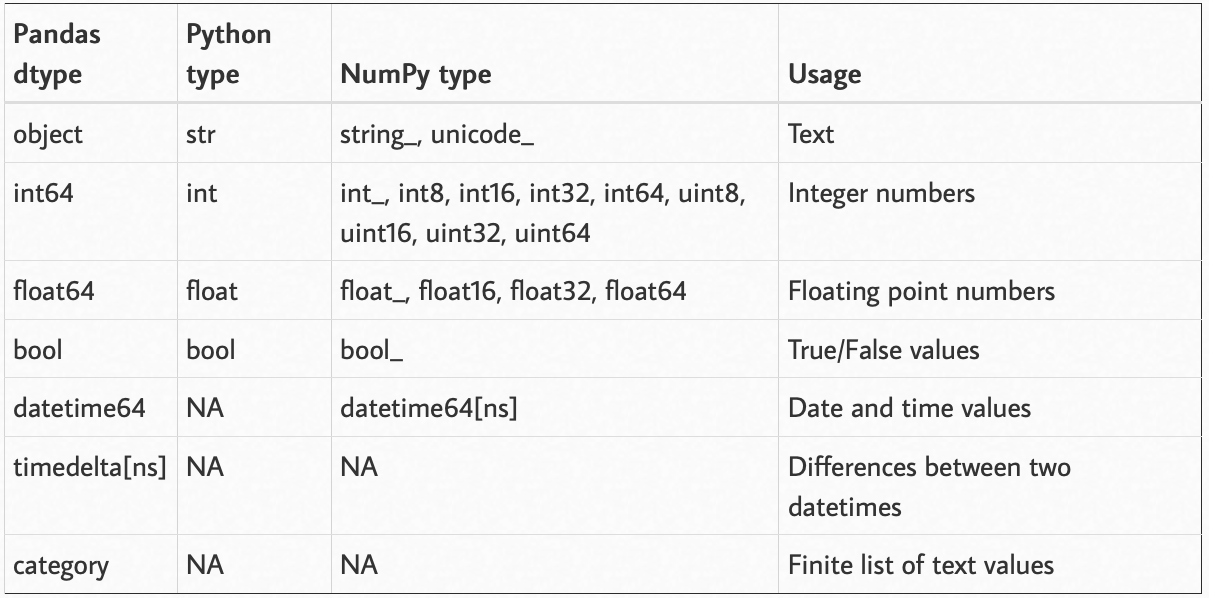

In our example, most of the columns of type `object` are actually categorical variables. We can change their type in the dataframe using the method `astype()`:

In [ ]:
df["workclass"] = df.workclass.astype("category")

And we can check that the type of the `workclass` column has changed to `category`:

In [ ]:
df.dtypes

age                     int64
workclass            category
fnlwgt                  int64
education              object
education-num           int64
marital-status         object
occupation             object
relationship           object
race                   object
sex                    object
capital-gain            int64
capital-loss            int64
hours-per-week          int64
native-country         object
earnings-category      object
dtype: object

Once the type of a column is set to "category", we have access to a whole range of methods (checkout this [article](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) for a comprehensive view on how to work with categorical data in pandas). For example here is how to print the different category values for "workclass":

In [ ]:
df["workclass"].cat.categories

Index([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype='object')

Likewise, converting columns to `int64`, `float64`, `bool`, `datetime64` and `timedelta[ns]` (if the column is compatible), will give you access to specific methods.

**Note**:
most of the time, you should only convert column types if you actually need to access specific methods.

<a id='P4' name='P4'></a>
## [Data Selection (Indexing)](#P0)


Here are the basic ways you can select specific columns and rows:

### select columns

To select a given column by name (and output a pandas Series):

In [ ]:
df["age"]

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64

or select a column by name and output a pandas DataFrame:

In [ ]:
df[["age"]]

,age
0,39
1,50
2,38
3,53
4,28
...,...
32556,27
32557,40
32558,58
32559,22


For selecting several columns by names (notice the list like nesting used in selecting data):

In [ ]:
df[["age", "workclass"]]

,age,workclass
0,39,State-gov
1,50,Self-emp-not-inc
2,38,Private
3,53,Private
4,28,Private
...,...,...
32556,27,Private
32557,40,Private
32558,58,Private
32559,22,Private


select first 3 rows:

In [ ]:
df[:3]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings-category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


### select specific rows and columns

to select a subset of rows and/or column, you mainly have two methods available:

- `df.loc[]` for label indexing 
- `df.iloc[]` for numerical indexing

see the difference:

In [ ]:
df.iloc[2:5, 10:]

,capital-gain,capital-loss,hours-per-week,native-country,earnings-category
2,0,0,40,United-States,<=50K
3,0,0,40,United-States,<=50K
4,0,0,40,Cuba,<=50K


In [ ]:
df.loc[2:5, "capital-gain":]

,capital-gain,capital-loss,hours-per-week,native-country,earnings-category
2,0,0,40,United-States,<=50K
3,0,0,40,United-States,<=50K
4,0,0,40,Cuba,<=50K
5,0,0,40,United-States,<=50K


The first element within the `[]` refers to row indces. Since the row indices of our dataframe have been automatically generated, their indexing in `loc` and `iloc` are the same.

The second element within the `[]` differs: while when using `iloc`, we refer to the column numbers, when using `loc`, we refer to the column names.

Otherwise, indexing works similarly to built-in list indexing:

In [ ]:
df.iloc[:, 0]  # all the rows for the first column

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64

In [ ]:
df.loc[:4]  # select all the columns for the first 4 rows

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings-category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.iloc[2:4, 5:8]  # select the rows 2 and 3 and columns 5, 6, 7

,marital-status,occupation,relationship
2,Divorced,Handlers-cleaners,Not-in-family
3,Married-civ-spouse,Handlers-cleaners,Husband


### Boolean Indexing

Another extremely handy option is to select all the rows of a dataframe that satisfy a given condition. To do so, you need to provide a pandas series of boolean that is the same size as the number of rows of the data frame you want to filter. 

For example, we can create a boolean series that has `True` values when the marital status is `" Divorced"` and `False` otherwise:

In [ ]:
df["marital-status"] == " Divorced"

0        False
1        False
2         True
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: marital-status, Length: 32561, dtype: bool

using this series, we can extract all the rows in the original dataframe `df` for which the `married-status` column is `" Divorced"`:

In [ ]:
df[df["marital-status"] == " Divorced"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings-category
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32543,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32544,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K


You can also combine conditions:

In [ ]:
df[(df["marital-status"] == " Divorced") & (df["education"] == " HS-grad")]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings-category
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
54,47,Self-emp-inc,109832,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,<=50K
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32422,47,Private,161950,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,32,United-States,<=50K
32427,41,Private,206878,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,32,United-States,<=50K
32491,33,Private,63079,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K


For more details on indexing, checkout [this link](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

<a id='P5' name='P5'></a>
## [Group by](#P0)

In [ ]:
# Splitting using group by on education

grps = df.groupby("education")
# => just divides data into different groups, one group per category in education column
grps

In [ ]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [ ]:
# access each group individually and print group names and sizes
for grp in grps:  ##=> notice that individual groups are accessed by looping over them
    print(grp[0])
    print(grp[1].shape)

 10th
(933, 15)
 11th
(1175, 15)
 12th
(433, 15)
 1st-4th
(168, 15)
 5th-6th
(333, 15)
 7th-8th
(646, 15)
 9th
(514, 15)
 Assoc-acdm
(1067, 15)
 Assoc-voc
(1382, 15)
 Bachelors
(5355, 15)
 Doctorate
(413, 15)
 HS-grad
(10501, 15)
 Masters
(1723, 15)
 Preschool
(51, 15)
 Prof-school
(576, 15)
 Some-college
(7291, 15)


In [ ]:
# Group by to perform aggregation across groups - the most used function
pd.DataFrame(df.groupby(["education", "workclass"]).agg("size"))

0
education     workclass              
 10th          ?                  100
               Federal-gov          6
               Local-gov           31
               Never-worked         2
               Private            695
...                               ...
 Some-college  Private           5094
               Self-emp-inc       226
               Self-emp-not-inc   486
               State-gov          325
               Without-pay          3

[144 rows x 1 columns]

In [ ]:
df.groupby(["education", "workclass"]).agg("mean")
# => same as above but esimate mean of each different groups

age  ...  hours-per-week
education     workclass                     ...                
 10th          ?                 33.980000  ...       33.150000
               Federal-gov       54.333333  ...       42.166667
               Local-gov         43.387097  ...       38.225806
               Never-worked      17.500000  ...       35.000000
               Private           36.326619  ...       36.827338
...                                    ...  ...             ...
 Some-college  Private           34.456223  ...       38.731645
               Self-emp-inc      46.150442  ...       49.362832
               Self-emp-not-inc  43.956790  ...       44.117284
               State-gov         34.289231  ...       34.698462
               Without-pay       53.000000  ...       35.333333

[144 rows x 6 columns]

In [ ]:
# get mean and median for the capital-gain after grouping for education and workclass
df.groupby(["education", "workclass"]).agg(
    age_mean=("age", "mean"), age_median=("age", "median")
)

age_mean  age_median
education     workclass                               
 10th          ?                 33.980000        24.0
               Federal-gov       54.333333        58.5
               Local-gov         43.387097        49.0
               Never-worked      17.500000        17.5
               Private           36.326619        33.0
...                                    ...         ...
 Some-college  Private           34.456223        32.0
               Self-emp-inc      46.150442        45.0
               Self-emp-not-inc  43.956790        44.0
               State-gov         34.289231        32.0
               Without-pay       53.000000        62.0

[144 rows x 2 columns]

<a id='P6' name='P6'></a>
## [Melt and pivot_table](#P0)

In [ ]:
df_ind = df.reset_index().rename(columns={"index": "id"})
df_ind

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings-category
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df_long = df_ind.melt(
    id_vars=["id"],
    value_vars=["age", "education-num"],
    var_name="type",
    value_name="wisdom",
)
df_long

,id,type,wisdom
0,0,age,39
1,1,age,50
2,2,age,38
3,3,age,53
4,4,age,28
...,...,...,...
65117,32556,education-num,12
65118,32557,education-num,9
65119,32558,education-num,9
65120,32559,education-num,9


In [ ]:
df_long.pivot_table(index="id", columns="type", values="wisdom")

type,age,education-num
id,,
0,39,13
1,50,13
2,38,9
3,53,7
4,28,13
...,...,...
32556,27,12
32557,40,9
32558,58,9


<a id='P7' name='P7'></a>
## [Apply](#P0)

The apply method allows us to apply a function (either built-in or user-defined) to each row of a column:

In [ ]:
def age2birthyear(age):
    return 2021 - age

In [ ]:
df["birth-year"] = 2021 - df["age"]
df[["age", "birth-year"]]

,age,birth-year
0,39,1982
1,50,1971
2,38,1983
3,53,1968
4,28,1993
...,...,...
32556,27,1994
32557,40,1981
32558,58,1963
32559,22,1999


In [ ]:
# compute the date of birth from the age
df["birth-year"] = df["age"].apply(age2birthyear)
df[["age", "birth-year"]]

,age,birth-year
0,39,1982
1,50,1971
2,38,1983
3,53,1968
4,28,1993
...,...,...
32556,27,1994
32557,40,1981
32558,58,1963
32559,22,1999


In [ ]:
# alternative solution without apply
df["birth-year"] = 2021 - df["age"]
df[["age", "birth-year"]]

,age,birth-year
0,39,1982
1,50,1971
2,38,1983
3,53,1968
4,28,1993
...,...,...
32556,27,1994
32557,40,1981
32558,58,1963
32559,22,1999


In [ ]:
# another example: get rid of spaces at the start and end of words
# in the marital-status column:
df["marital-status"].apply(lambda x: x.strip())

0             Never-married
1        Married-civ-spouse
2                  Divorced
3        Married-civ-spouse
4        Married-civ-spouse
                ...        
32556    Married-civ-spouse
32557    Married-civ-spouse
32558               Widowed
32559         Never-married
32560    Married-civ-spouse
Name: marital-status, Length: 32561, dtype: object

<a id='P8' name='P8'></a>
## [Basic Plotting](#P0)

Pandas also provides the luxury of making simple visualizations (using **Matplotlib** Python library) like line plots, bar plots, boxplots etc. This comes in handy as quite often only basic plots are needed to perform data exploration.

Here are 2 examples:

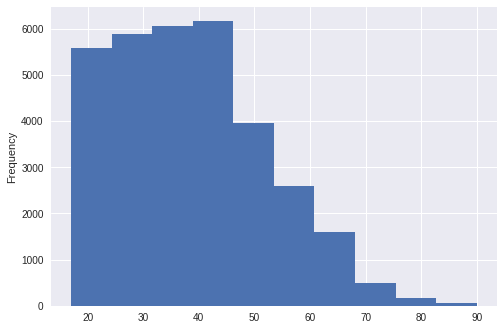

In [ ]:
# A simple plot - first image

_ = df["age"].plot(kind="hist")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


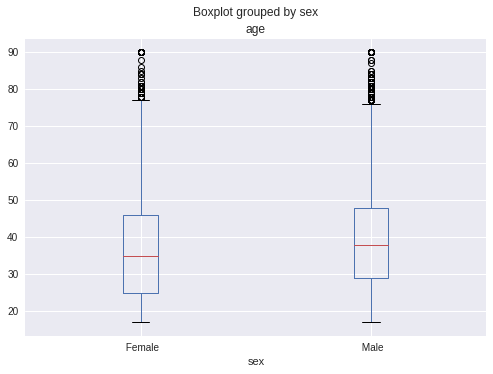

In [ ]:
# group by and boxplot together - second image

_ = df.boxplot(column="age", by="sex")  # => group by on sex and plot age column

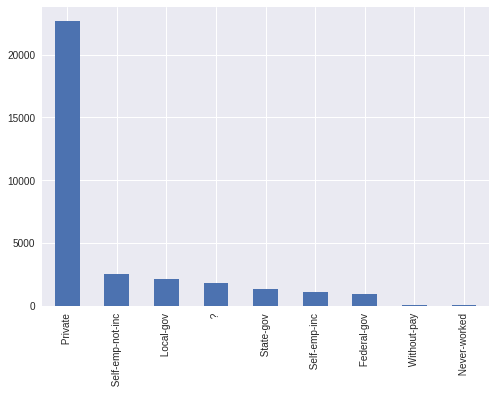

In [ ]:
_ = df["workclass"].value_counts().plot(kind="bar")

<a id='P9' name='P9'></a>
## [Merging and Concat](#P0)

### Merge

In [ ]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [ ]:
# do an inner join on 'key'
result = pd.merge(left, right, on=["key"])
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


### Concatenate pandas objects along a particular axis

In [ ]:
s1 = pd.Series(["a", "b"])
s2 = pd.Series(["c", "d"])
# concatenate along axis=0
df_cat = pd.concat([s1, s2], axis=0)
df_cat

0    a
1    b
0    c
1    d
dtype: object

In [ ]:
# fix the index (it should be [0 1 2 3])
df_cat.reset_index(drop=True)

0    a
1    b
2    c
3    d
dtype: object

In [ ]:
# do the same already while concatenating
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

In [ ]:
# concatenate along the second axis
pd.concat([s1, s2], axis=1)

,0,1
0,a,c
1,b,d


<a id='CL' name='CL'></a>
- [Pandas Cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Pandas in 10 min](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
- [Group by in Pandas](https://pandas.pydata.org/pandas-docs/stable/groupby.html#plotting)
- [Minimally sufficient Pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)
- [Pandas API reference](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>